In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Дискретное распределение

Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [5]:
sample = np.random.choice([1,2,3,4,5,6], 100)

Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:

In [6]:
# посчитаем число выпадений каждой из сторон:
from collections import Counter

c = Counter()
for s in sample:
    c[s] += 1

print("Число выпадений каждой из сторон:")    
print(c, '\n')

# теперь поделим на общее число подбрасываний и получим вероятности:
print("Вероятности выпадений каждой из сторон:")
print({k: v/100.0 for k, v in c.items()})

Число выпадений каждой из сторон:
Counter({5: 19, 4: 17, 1: 16, 2: 16, 3: 16, 6: 16}) 

Вероятности выпадений каждой из сторон:
{1: 0.16, 2: 0.16, 3: 0.16, 4: 0.17, 5: 0.19, 6: 0.16}


Это и есть оценка функции вероятности дискретного распределения.

# Непрерывное распределение

Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu$=0 и $\sigma^2$=1):

In [7]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)

Эмпирическая функция распределения для полученной выборки:

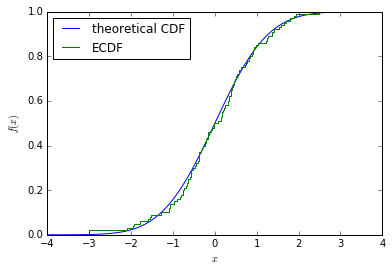

In [8]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Гистограмма выборки:

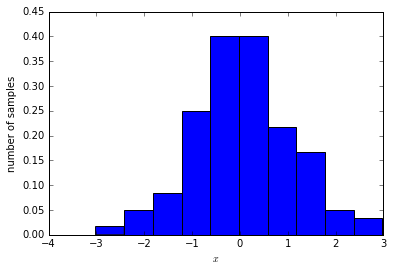

In [9]:
plt.hist(sample, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

Попробуем задавать число карманов гистограммы вручную:

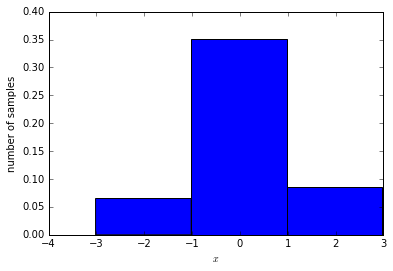

In [10]:
plt.hist(sample, bins=3, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

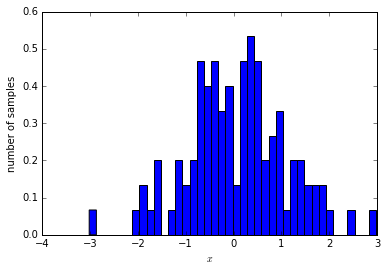

In [11]:
plt.hist(sample, bins=40, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

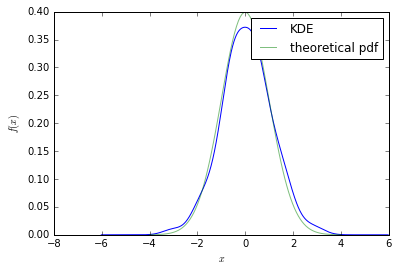

In [12]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую функцию распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [90]:
import numpy as np
from scipy import stats

N = 130
a = np.random.normal(1197.69, 1, 116182.2)
mean, sigma = a.mean(), a.std(ddof=1)
conf_int_a = stats.norm.interval(0.997, loc=mean, scale=sigma)

print('{:0.2%} of the single draws are in conf_int_a'
      .format(((a >= conf_int_a[0]) & (a < conf_int_a[1])).sum() / float(N)))

M = 130
b = np.random.normal(0, 1, (N, M)).mean(axis=1)
conf_int_b = stats.norm.interval(0.997, loc=0, scale=1 / np.sqrt(M))
print('{:0.2%} of the means are in conf_int_b'
      .format(((b >= conf_int_b[0]) & (b < conf_int_b[1])).sum() / float(N)))

89126.92% of the single draws are in conf_int_a
100.00% of the means are in conf_int_b


C:\Users\azraev\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [91]:
conf_int_b

(-0.26028783466226169, 0.26028783466226069)